In [41]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
plt.style.use('dark_background')

### Bootstrap
По материалам [Бутстрап, или прикладная статистика почти без формул](https://habr.com/ru/post/192000/)

В тестовой группе из 893 пришедших у нас что-то купили 34, а в контрольной группе из 923 пришедших что-то купили 28.
$X_1$, $X_2$ - при большом количестве наблюдений биномиальное распределение похоже на нормальное. Нас интересует разность. Нормальное распределение бесконечно делимо, вычитаем матожидания и складываем дисперсии.
$E = X_1 - X_2, \; D = (p_1*(1-p_1)) + (p_2*(1-p_2)), \; \sigma = \sqrt{D}$

$P(|E-X|<2\sigma) = P(E-2\sigma < X < E + 2\sigma) = 2F_0(2) \approx 0.95$

In [2]:
A_n, B_n = 893, 923
A_pos, B_pos = 34, 28
A_conv, B_conv = A_pos/A_n, B_pos/B_n
o_diff = A_conv - B_conv
print('Conversion of A:', str(round(A_conv*100, 4)) + '%')
print('Conversion of B:', str(round(B_conv*100, 4)) + '%')
print('Observed difference:', str(round(o_diff, 6)*100) + '%')

Conversion of A: 3.8074%
Conversion of B: 3.0336%
Observed difference: 0.7738%


In [3]:
A_ones, B_ones = np.ones(A_pos), np.ones(B_pos)
A_zeros, B_zeros = np.zeros(A_n - A_pos), np.zeros(B_n - B_pos)
A_sample, B_sample = np.r_[A_ones, A_zeros], np.r_[B_ones, B_zeros]
print(A_sample.shape, B_sample.shape)
A_sample.mean(), B_sample.mean()

(893,) (923,)


(0.03807390817469205, 0.030335861321776816)

In [4]:
%%time
A_convs, B_convs, diffs = [], [], []

for i in range(int(1e+5)):
    
    A_idx = np.random.randint(A_sample.shape, size=A_sample.shape)
    B_idx = np.random.randint(B_sample.shape, size=B_sample.shape)
    A_mean, B_mean = A_sample[A_idx].mean(), B_sample[B_idx].mean()
    A_convs.append(A_mean), B_convs.append(B_mean)
    diffs.append(A_mean - B_mean)

CPU times: user 9.08 s, sys: 324 ms, total: 9.4 s
Wall time: 14 s


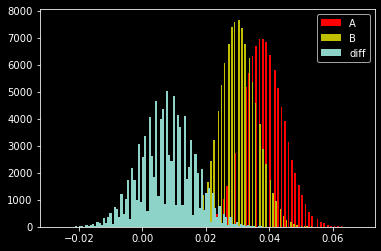

In [5]:
plt.hist(A_convs, bins=100, color='r', label='A')
plt.hist(B_convs, bins=100, color='y', label='B')
plt.hist(diffs, bins=100, label='diff')
plt.legend()
plt.show()

In [6]:
alpha = 0.05
l, h = np.quantile(diffs, [alpha, 1-alpha])
conf_int = (round(l*100, 4), round(h*100, 4))
conf_int = list(map(lambda x: str(x)+'5%', conf_int))
print('Confidence interval: ', ', '.join(conf_int))

Confidence interval:  -0.64575%, 2.20415%


In [7]:
# доверительный интервал с помощью z-критерия
std = np.sqrt(A_conv*(1-A_conv)/A_n + B_conv*(1-B_conv)/B_n)
E = A_conv - B_conv

conf_int = E - sts.norm().isf(0.05)*std, E + sts.norm().isf(0.05)*std
conf_int = (str(round(i*100, 4))+'%' for i in conf_int)

print('Confidence interval: ', ', '.join(conf_int))

Confidence interval:  -0.6304%, 2.178%


### Permutation test. P-value

По материалам из книги ***"Practival Statistics for Data Scientists" by Peter Bruce and Andrew Bruce*** (page 180).

$
\begin{array}{|c|c|с|}
\hline Outcome         & Price A & Price B      \\\hline
\hline Conversion      & 200       & 182        \\\hline
\hline No\;Conversion   & 23569     & 22406      \\\hline
\end{array}
$

- $H_0:$ there is no difference between the rates.
- $H_1:$ the difference is statistically significant.

In [8]:
A_pos, A_neg = 200, 23539
B_pos, B_neg = 182, 22406
A, B = (A_pos + A_neg), (B_pos + B_neg)
A_conv, B_conv = A_pos/A, B_pos/B
o_diff = A_conv - B_conv  # observed difference

print('Conversion of A:', str(round(A_conv, 6)*100) + '%')
print('Conversion of B:', str(round(B_conv, 6)*100) + '%')
print('Observed difference:', str(round(o_diff, 6)*100) + '%')

Conversion of A: 0.8425%
Conversion of B: 0.8057%
Observed difference: 0.0368%


In [9]:
%%time
ones, zeros = np.ones(A_pos + B_pos), np.zeros(A_neg + B_neg)
sample = np.r_[ones, zeros]
# ones.shape, zeros.shape, sample.shape

diffs = []

for i in range(int(1e+4)):
    A_sample = np.random.choice(sample, A)
    B_sample = np.random.choice(sample, B)
    diff = A_sample.mean() - B_sample.mean()
    diffs.append(diff)

CPU times: user 12.3 s, sys: 279 ms, total: 12.5 s
Wall time: 16.7 s


In [16]:
diffs = np.array(diffs)
p_val = sum(diffs > o_diff)/len(diffs)
print('p-value', p_val)

p-value 0.3271


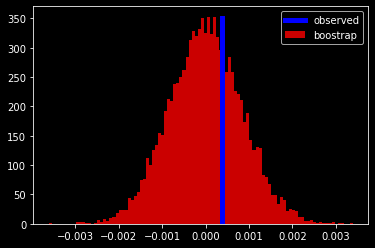

In [35]:
plt.hist(diffs, bins=100, color='r', alpha=0.8, label='boostrap')
plt.plot([o_diff, o_diff], [0, 350], color='b', label='observed', linewidth=5)
plt.legend()
plt.show()